<a href="https://colab.research.google.com/gist/Abeer3/66f2791413306e054322367b961cb5e4/english_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
The initial code is the result of hard work of unique individuals, which has been modified to serve our project purpose.  
 
This code can be used on English datasets to conduct data preprocessing, estimate sentiment scores, count most and least frequent keywords and hashtags, and build a classification model. 

It consists of 10 steps that can be used as needed.  

```



# Pre-workshop: Installing required libraries

In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

# Step 1: Import important libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [ ]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Step 2: Read data file

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read csv file and save it in a data frame
data_df=pd.read_csv('/content/drive/My Drive/(your file name).csv') 

# Step 3: Explore that data

In [ ]:
# how much data do I have?
len(data_df)

In [ ]:
# How about if I want to see part of the data?
#data_df[1000:1200]
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation
0,"Lingo Ink Presents ""Open Mindz"" Health &amp; Wellness VS Vaccines Episode https://t.co/DBYgEAVQeZ via @YouTube #fitness… https://t.co/xlDfX5CZfu",0.0,2.0,2,Twitter for iPhone,1.0,NaN
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN
4,"In case you didn't notice, the Telegraph article goes into the juicy detail.\n(https://t.co/jpjUc5xCjP)\n\n#UKlockdown… https://t.co/maCivxdT81",0.0,0.0,0,Twitter Web App,1.0,NaN


# Step 4: Cleaning Noise

In [ ]:
# Remove nosiy tweets
noise=["article","Broadcast","Check","chiefs","Embassy","KETO","Library","makeup","music","join us","muslim","paper","partner","Presents","question","Read","report","research","scientist","seminar","skin","Trump"]

In [ ]:
def remove_noise(tweet):
    label="ok"
    for word in noise:
        if word in tweet:
            label="noise"
    return label

In [ ]:
# apply the method
data_df["is Noise"] = data_df['tweetText'].apply(lambda x: remove_noise(str(x)))

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise
0,"Lingo Ink Presents ""Open Mindz"" Health &amp; Wellness VS Vaccines Episode https://t.co/DBYgEAVQeZ via @YouTube #fitness… https://t.co/xlDfX5CZfu",0.0,2.0,2,Twitter for iPhone,1.0,NaN,noise
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok
4,"In case you didn't notice, the Telegraph article goes into the juicy detail.\n(https://t.co/jpjUc5xCjP)\n\n#UKlockdown… https://t.co/maCivxdT81",0.0,0.0,0,Twitter Web App,1.0,NaN,noise


In [ ]:
# remove the noise
data_df=data_df[data_df["is Noise"]!="noise"]

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok


In [ ]:
len(data_df)

1823

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/uk/(your file name for example: UKnonoise).csv')

# Step5: Counting Positive Scores

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive(your file name for example:UKnonoise).csv')

In [ ]:
# read positive words list
from google.colab import drive
drive.mount('/content/drive')
pos_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKpositive).csv')

In [ ]:
pos_df

,word
0,accurate
1,agree
2,amazing
3,appreciate
4,better
5,comfortable
6,cured
7,enjoy
8,fascinated
9,fine


In [ ]:
pos_list=pos_df["word"].values.tolist()

In [ ]:
def pos_sentiment(tweet):   
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:   
        if word in tweet:
          count+=1
    return count

In [ ]:
data_df["pos_count"] = data_df['tweetText'].apply(lambda x: pos_sentiment(str(x)))

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name for example:UKPositiveCount).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read retweet and favorite
RetweetFavorite_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKnonoise).csv')
RetweetFavorite_list=RetweetFavorite_df['RetweetFavorite'].values.tolist()
Positive_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKPositiveCount).csv')
Positive_count=Positive_df["pos_count"].values.tolist()

In [ ]:
print(RetweetFavorite_list)
print(Positive_count)

[101, 2, 2, 2, 3, 0, 0, 0, 0, 129, 1, 2, 0, 0, 1, 2, 0, 0, 3, 0, 27, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 117, 0, 1, 1, 0, 9, 12, 4, 7, 4, 0, 4, 5, 475, 1, 3, 5, 2, 11, 4, 2, 3, 5, 0, 5, 2, 2, 1, 1, 0, 1, 1, 0, 7, 0, 0, 0, 0, 0, 1, 8, 1, 0, 19, 4, 1, 2, 0, 0, 1, 5, 1, 3, 0, 1, 1, 1, 0, 14, 61, 3, 2, 0, 1, 0, 0, 2, 3, 16, 1, 2, 2, 7, 1, 2, 3, 0, 0, 0, 0, 10, 3, 21, 2263, 286, 2, 0, 0, 0, 0, 0, 9, 1, 2, 0, 5, 4, 3, 0, 1, 0, 0, 0, 3, 0, 2, 26, 1133, 0, 2, 35, 4, 0, 44, 0, 0, 3, 0, 2, 6, 1, 7, 0, 1, 129, 0, 1, 5, 2, 0, 0, 0, 1, 1, 5, 1, 1, 6, 0, 0, 3, 0, 0, 0, 0, 1, 1, 8, 0, 3, 1, 1, 0, 0, 1, 5, 1, 17, 1, 8, 0, 9, 0, 0, 4, 1, 1, 2, 32, 160, 3, 0, 0, 1, 17, 1, 0, 0, 10, 6, 1, 3, 1, 1, 0, 5, 0, 4, 2, 2, 3, 0, 2, 1, 0, 0, 0, 0, 0, 59, 0, 4, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 6, 0, 5, 3, 3, 2, 1, 0, 2, 0, 0, 0, 16, 7, 0, 0, 0, 0, 72, 0, 4, 4, 1, 0, 0, 3, 2, 2, 1, 0, 0, 11, 1, 38, 8, 0, 0, 8, 0, 6, 0, 9, 15, 19, 0, 1, 1, 3, 4, 1, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3, 4, 1, 0, 1,

In [ ]:
def PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list):   
    # loop through the list of words and see if they are in the tweet text
  weight=[]
  for count,number in zip(Positive_count,RetweetFavorite_list):
    if number!=0:
      x=count*number
      weight.append(x)
    else:
      weight.append(count)
  return weight      

In [ ]:
PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)

[101,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 117,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 2,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 129,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 160,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0

In [ ]:
#apply the method to the data
data_df["PRetweetFavoriteWeight"] = PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0


# Step6: Counting Negative Scores

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name for example:UKnonoise).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read negative words list
neg_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKnegative).csv')

In [ ]:
neg_list=neg_df["word"].values.tolist()

In [ ]:
def neg_sentiment(tweet):    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in neg_list:   
        if word in tweet:
          count+=1
    return count

In [ ]:
#apply the method to the data
data_df["neg_count"] = data_df['tweetText'].apply(lambda x: neg_sentiment(str(x)))

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name for example:UKNegativeCount).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read retweet and favorite
RetweetFavorite_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKnonoise).csv')
RetweetFavorite_list=RetweetFavorite_df['RetweetFavorite'].values.tolist()
Negative_df=pd.read_csv('/content/drive/My Drive/(your file name for example:UKNegativeCount).csv')
Negative_count=Negative_df["neg_count"].values.tolist()

In [ ]:
print(RetweetFavorite_list)
print(Negative_count)

[101, 2, 2, 2, 3, 0, 0, 0, 0, 129, 1, 2, 0, 0, 1, 2, 0, 0, 3, 0, 27, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 117, 0, 1, 1, 0, 9, 12, 4, 7, 4, 0, 4, 5, 475, 1, 3, 5, 2, 11, 4, 2, 3, 5, 0, 5, 2, 2, 1, 1, 0, 1, 1, 0, 7, 0, 0, 0, 0, 0, 1, 8, 1, 0, 19, 4, 1, 2, 0, 0, 1, 5, 1, 3, 0, 1, 1, 1, 0, 14, 61, 3, 2, 0, 1, 0, 0, 2, 3, 16, 1, 2, 2, 7, 1, 2, 3, 0, 0, 0, 0, 10, 3, 21, 2263, 286, 2, 0, 0, 0, 0, 0, 9, 1, 2, 0, 5, 4, 3, 0, 1, 0, 0, 0, 3, 0, 2, 26, 1133, 0, 2, 35, 4, 0, 44, 0, 0, 3, 0, 2, 6, 1, 7, 0, 1, 129, 0, 1, 5, 2, 0, 0, 0, 1, 1, 5, 1, 1, 6, 0, 0, 3, 0, 0, 0, 0, 1, 1, 8, 0, 3, 1, 1, 0, 0, 1, 5, 1, 17, 1, 8, 0, 9, 0, 0, 4, 1, 1, 2, 32, 160, 3, 0, 0, 1, 17, 1, 0, 0, 10, 6, 1, 3, 1, 1, 0, 5, 0, 4, 2, 2, 3, 0, 2, 1, 0, 0, 0, 0, 0, 59, 0, 4, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 6, 0, 5, 3, 3, 2, 1, 0, 2, 0, 0, 0, 16, 7, 0, 0, 0, 0, 72, 0, 4, 4, 1, 0, 0, 3, 2, 2, 1, 0, 0, 11, 1, 38, 8, 0, 0, 8, 0, 6, 0, 9, 15, 19, 0, 1, 1, 3, 4, 1, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3, 4, 1, 0, 1,

In [ ]:
def NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list):   
    # loop through the list of words and see if they are in the tweet text
  weight=[]
  for count,number in zip(Negative_count,RetweetFavorite_list):
    if number!=0:
      x=count*number
      weight.append(x)
    else:
      weight.append(count)
  return weight      

In [ ]:
NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

[101,
 0,
 0,
 0,
 3,
 2,
 2,
 0,
 1,
 258,
 0,
 6,
 0,
 1,
 2,
 4,
 1,
 0,
 3,
 0,
 27,
 0,
 1,
 0,
 1,
 10,
 2,
 0,
 1,
 1,
 0,
 117,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 10,
 950,
 0,
 0,
 0,
 0,
 11,
 4,
 0,
 0,
 5,
 0,
 0,
 4,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 8,
 1,
 0,
 0,
 4,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 6,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 1,
 2,
 0,
 7,
 1,
 0,
 6,
 0,
 1,
 1,
 2,
 0,
 0,
 21,
 4526,
 572,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 6,
 2,
 2,
 26,
 0,
 0,
 2,
 0,
 4,
 2,
 0,
 0,
 1,
 0,
 1,
 4,
 12,
 2,
 0,
 1,
 1,
 129,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 10,
 0,
 2,
 12,
 2,
 1,
 3,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 9,
 1,
 1,
 8,
 0,
 0,
 0,
 0,
 160,
 3,
 1,
 0,
 1,
 34,
 2,
 0,
 0,
 10,
 6,
 1,
 3,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 2,
 3,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 4,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 4,


In [ ]:
#apply the method to the data
data_df["NRetweetFavoriteWeight"] = NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101,1,101
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0,1,3


In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name for example:UKWeighted).csv')

# Step7: Classify tweet as Positive, Negative, or Neutral 



In [ ]:
PC=PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)
NC=NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

In [ ]:
def tweet_sentiment(PC,NC):    
    labelclass=[]
    for Val1,Val2 in zip(PC,NC):
      if Val1 > Val2:
          label = "Positive"
          labelclass.append(label)
      elif Val1 < Val2:
          label = "Negative"
          labelclass.append(label)
      else:
          label = "Neutral"
          labelclass.append(label)
    return labelclass

In [ ]:
data_df["sentiment"] = tweet_sentiment(PC,NC)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101,1,101,Neutral
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0,1,3,Negative


In [ ]:
def weighted_tweet_sentiment(PC,NC):    
    PV=[0,]
    NV=[0,]
    NUV=[0,]
    result=[]
    for Val1,Val2 in zip(PC,NC):
      if Val1 > Val2:
          PV.append(Val1)        
      elif Val1 < Val2:
          NV.append(Val2)
      else:
        if Val1!='nan':
          NUV.append(Val1)
    PVS=sum(PV)  
    NVS=sum(NV)
    NUVS=sum(NUV)      
    result.append(PVS)
    result.append(NVS)
    result.append(NUVS)

    print(result)
    return result

In [ ]:
x=weighted_tweet_sentiment(PC,NC)

[1221, 14069, 805]


In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSASentiment).csv')

# Step 8: Explore the results

In [ ]:
Positive=x[0]
Negative=x[1]
Neutural=x[2]

In [ ]:
print(Positive)
print(Negative)
print(Neutural)

1221
14069
805


In [ ]:
tweets_by_sentiment = x
index=['Positive','Negative','Neutural']

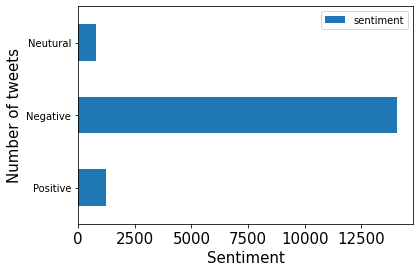

In [ ]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
df=pd.DataFrame({'sentiment': x},index=index)
df.plot(ax=ax, kind='barh')

# Step 9: Clean the text

In [ ]:
# remove punctuations علامات الترقيم  
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
#start processing the tweet 
def processPost(tweet):

    #split hashtag words    
    tweet = re.sub('_',' ',tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)

    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)

    #normalize letters
    tweet= tweet.lower()
         
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())   

    #remove meaningless single letters
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    tweet=re.sub(pattern, '', tweet).strip()
    tweet=re.sub("\s+", " ", tweet)
    
    return tweet

In [ ]:
data_df["clean text"] = data_df['tweetText'].apply(lambda x: processPost(str(x)))

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text,tokens
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101,1,101,Neutral,group of amazing psychologists and mental health specialists to be part of speaking out about the consequences,"[group, of, amazing, psychologists, and, mental, health, specialists, to, be, part, of, speaking, out, about, the, consequences]"
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,britain starts accelerated review for astrazenecas potential covid vaccine vaccinate,"[britain, starts, accelerated, review, for, astrazenecas, potential, covid, vaccine, vaccinate]"
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,health passports are being used as pseudonym for your tamperproof global id assigned at birth on which your heal,"[health, passports, are, being, used, as, pseudonym, for, your, tamperproof, global, id, assigned, at, birth, on, which, your, heal]"
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,takes no leadership vc show none either they will continue to dictate,"[takes, no, leadership, vc, show, none, either, they, will, continue, to, dictate]"
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0,1,3,Negative,in case you missed bojo giving the health passport agenda game away on the th september moonshot press confere,"[in, case, you, missed, bojo, giving, the, health, passport, agenda, game, away, on, the, th, september, moonshot, press, confere]"


## 1- Convert text to tokens

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text,tokens
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101,1,101,Neutral,group of amazing psychologists and mental health specialists to be part of speaking out about the consequences,"[group, of, amazing, psychologists, and, mental, health, specialists, to, be, part, of, speaking, out, about, the, consequences]"
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,britain starts accelerated review for astrazenecas potential covid vaccine vaccinate,"[britain, starts, accelerated, review, for, astrazenecas, potential, covid, vaccine, vaccinate]"
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,health passports are being used as pseudonym for your tamperproof global id assigned at birth on which your heal,"[health, passports, are, being, used, as, pseudonym, for, your, tamperproof, global, id, assigned, at, birth, on, which, your, heal]"
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,takes no leadership vc show none either they will continue to dictate,"[takes, no, leadership, vc, show, none, either, they, will, continue, to, dictate]"
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0,1,3,Negative,in case you missed bojo giving the health passport agenda game away on the th september moonshot press confere,"[in, case, you, missed, bojo, giving, the, health, passport, agenda, game, away, on, the, th, september, moonshot, press, confere]"


In [ ]:
print(data_df["tokens"])

1       [group, of, amazing, psychologists, and, mental, health, specialists, to, be, part, of, speaking, out, about, the, consequences]                                                                                                                                                                                                                                                                                                    
2       [britain, starts, accelerated, review, for, astrazenecas, potential, covid, vaccine, vaccinate]                                                                                                                                                                                                                                                                                                                                     
3       [health, passports, are, being, used, as, pseudonym, for, your, tamperproof, global, id, assigned, at, birth, on, which, your, heal]  

In [ ]:
English_conjunction='have','about','the','to','of','and','a','in','is','i','for','are','you','this','that','on','be','my','we','out','with','all','it','am','any','as','by','he','she','his','him','her','an','our','own','so','there','they','these','amp','at','off','nov','here','does','do','who','did','or','was','were','if','but','s','im','from','has','your','not','can','its','what','m','no','just','how','now','t','their','been','up','me','than','one','then','dont','will','us','more','being','some','would','when','get','why','go','come'
tokens=data_df["tokens"]
result = [list(filter(lambda x: x not in English_conjunction, word)) for word in tokens]
print (result)
data_df['KeyWords'] = result

[['group', 'amazing', 'psychologists', 'mental', 'health', 'specialists', 'part', 'speaking', 'consequences'], ['britain', 'starts', 'accelerated', 'review', 'astrazenecas', 'potential', 'covid', 'vaccine', 'vaccinate'], ['health', 'passports', 'used', 'pseudonym', 'tamperproof', 'global', 'id', 'assigned', 'birth', 'which', 'heal'], ['takes', 'leadership', 'vc', 'show', 'none', 'either', 'continue', 'dictate'], ['case', 'missed', 'bojo', 'giving', 'health', 'passport', 'agenda', 'game', 'away', 'th', 'september', 'moonshot', 'press', 'confere'], ['almost', 'likely', 'kill', 'myself', 'dying', 'covid', 'll', 'start', 'giving', 'shit', 'virus'], ['yet', 'another', 'list', 'another', 'bland', 'deptartment', 'health', 'quote', 'everything', 'fine', 'point', 'accept', 'systemic', 'problem', 'those', 'setting', 'goals', 'system', 'need', 'take', 'responsbility', 'failure'], ['loving', 'new', 'dove', 'soap', 'commercial', 'putting', 'health', 'world', 'above', 'themselves', 'washtocare', 'co

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,RetweetFavorite,tweetSource,tweet date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text,tokens,KeyWords
1,A group of amazing psychologists and mental health specialists to be part of! Speaking out about the consequences o… https://t.co/f98gmkGjKI,20.0,81.0,101,Twitter for iPhone,1.0,NaN,ok,1,101,1,101,Neutral,group of amazing psychologists and mental health specialists to be part of speaking out about the consequences,"[group, of, amazing, psychologists, and, mental, health, specialists, to, be, part, of, speaking, out, about, the, consequences]","[group, amazing, psychologists, mental, health, specialists, part, speaking, consequences]"
2,Britain starts accelerated review for AstraZeneca's potential COVID-19 vaccine https://t.co/kZRGQ7VSKR \n#vaccinate… https://t.co/jjBISi8ghk,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,britain starts accelerated review for astrazenecas potential covid vaccine vaccinate,"[britain, starts, accelerated, review, for, astrazenecas, potential, covid, vaccine, vaccinate]","[britain, starts, accelerated, review, astrazenecas, potential, covid, vaccine, vaccinate]"
3,Health passports are being used as a pseudonym for your tamper-proof global ID assigned at birth on which your heal… https://t.co/OEzWF6QYtx,2.0,0.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,health passports are being used as pseudonym for your tamperproof global id assigned at birth on which your heal,"[health, passports, are, being, used, as, pseudonym, for, your, tamperproof, global, id, assigned, at, birth, on, which, your, heal]","[health, passports, used, pseudonym, tamperproof, global, id, assigned, birth, which, heal]"
6,@GavinWilliamson takes no leadership. @sheffhallamuni + @Hallam_VC show none either - they WILL continue to DICTATE… https://t.co/0rkQ7MjMFY,0.0,2.0,2,Twitter Web App,1.0,NaN,ok,0,0,0,0,Neutral,takes no leadership vc show none either they will continue to dictate,"[takes, no, leadership, vc, show, none, either, they, will, continue, to, dictate]","[takes, leadership, vc, show, none, either, continue, dictate]"
7,In case you missed Bojo giving the 'health passport' agenda game away on the 9th September 'moonshot' press confere… https://t.co/cLcKZulyQ7,0.0,3.0,3,Twitter for Android,1.0,NaN,ok,0,0,1,3,Negative,in case you missed bojo giving the health passport agenda game away on the th september moonshot press confere,"[in, case, you, missed, bojo, giving, the, health, passport, agenda, game, away, on, the, th, september, moonshot, press, confere]","[case, missed, bojo, giving, health, passport, agenda, game, away, th, september, moonshot, press, confere]"


In [ ]:
all_words = [word for result in data_df["KeyWords"] for word in result]
sentence_lengths = [len(result) for result in data_df["KeyWords"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

19107 words total, with a vocabulary size of 5233
Max sentence length is 31


In [ ]:
# count the number of words
word_counter = Counter(all_words)

In [ ]:
# show the most common words
word_counter.most_common(20)

[('health', 538),
 ('covid', 326),
 ('coviduk', 324),
 ('lockdown', 274),
 ('mental', 185),
 ('people', 182),
 ('rules', 159),
 ('uk', 157),
 ('care', 154),
 ('lockdownuk', 124),
 ('london', 102),
 ('public', 82),
 ('tier', 74),
 ('nhs', 71),
 ('government', 68),
 ('coronavirus', 63),
 ('time', 61),
 ('like', 60),
 ('need', 58),
 ('british', 58)]

In [ ]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('career', 1),
 ('sometime', 1),
 ('decolonizing', 1),
 ('shouldn', 1),
 ('du', 1),
 ('deeper', 1),
 ('virusundetected', 1),
 ('cancers', 1),
 ('bapam', 1),
 ('artists', 1)]

In [ ]:
tweets = pd.Series(data_df['tweetText'])
tweets.str.extractall(r'(\#\w+)')[0].value_counts()

#Covid19UK                      299
#lockdownUK                     113
#Lockdown2                      63 
#COVID19                        60 
#lockdown                       24 
#mentalhealth                   21 
#coronavirus                    19 
#NHS                            18 
#coronavirusuk                  16 
#UK                             12 
#COVIDIOTS                      11 
#MentalHealthAwareness          9  
#COVID                          9  
#Covid19                        8  
#Covid_19                       7  
#health                         7  
#covid19uk                      6  
#COVID19UK                      6  
#SecondLockdown                 6  
#pandemic                       6  
#Brexit                         5  
#lockdown2uk                    5  
#London                         5  
#southLondon                    5  
#BorisJohnson                   5  
#Halloween                      5  
#Covid19uk                      5  
#Wales                      


## 2-Top words used by Tweets with Positive score

In [ ]:
for_df=data_df[data_df["sentiment"]=="Positive"]

In [ ]:
For_words = [ word for tokens in for_df["KeyWords"] for word in tokens]

In [ ]:
for_word_counter = Counter(For_words)

In [ ]:
for_word_counter.most_common(30)

[('health', 39),
 ('coviduk', 39),
 ('rules', 39),
 ('covid', 28),
 ('help', 24),
 ('good', 23),
 ('follow', 23),
 ('care', 21),
 ('lockdown', 20),
 ('support', 19),
 ('people', 18),
 ('uk', 15),
 ('better', 15),
 ('public', 12),
 ('during', 12),
 ('lockdownuk', 12),
 ('please', 12),
 ('london', 11),
 ('very', 10),
 ('nhs', 9),
 ('free', 8),
 ('local', 8),
 ('tier', 8),
 ('following', 8),
 ('thank', 7),
 ('still', 7),
 ('coronavirus', 6),
 ('insurance', 6),
 ('keep', 6),
 ('stay', 6)]

## 3-Top words used by Tweets with Negative score

In [ ]:
against_df=data_df[data_df["sentiment"]=="Negative"]

In [ ]:
against_words = [ word for tokens in against_df["KeyWords"] for word in tokens]

In [ ]:
against_word_counter = Counter(against_words)

In [ ]:
against_word_counter.most_common(30)

[('health', 235),
 ('mental', 145),
 ('lockdown', 136),
 ('coviduk', 99),
 ('covid', 98),
 ('people', 67),
 ('uk', 56),
 ('lockdownuk', 51),
 ('need', 45),
 ('rules', 42),
 ('care', 39),
 ('another', 30),
 ('time', 26),
 ('going', 26),
 ('during', 24),
 ('deaths', 24),
 ('government', 24),
 ('week', 21),
 ('mentalhealth', 21),
 ('public', 20),
 ('physical', 20),
 ('new', 20),
 ('nhs', 20),
 ('tier', 20),
 ('inequalities', 20),
 ('made', 19),
 ('second', 19),
 ('london', 19),
 ('think', 18),
 ('pandemic', 18)]

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(yout file name for example: UKfinal).csv')

# Step 10: ML Classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
# remove the "Neutral" class
data_df=data_df[data_df['sentiment'] != "Neutral"]

In [ ]:
# change values to numeric
data_df['sentiment'] = data_df['sentiment'].map({'Positive': 1, 'Negative': 0}) 

In [ ]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['sentiment']

In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(766, 2975)

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(383, 2975) (383, 2975) (383,) (383,)


## SVM Classifier

In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

SVM accuracy: 0.82


In [ ]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))


10-fold cross-validation:
[0.84415584 0.85714286 0.83116883 0.83116883 0.80519481 0.83116883
 0.84210526 0.84210526 0.84210526 0.85526316]
The average accuracy of the SVM classifier is : 0.84


In [ ]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[294   2]
 [ 68  19]]


In [ ]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")


Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       296
           1       0.90      0.22      0.35        87

    accuracy                           0.82       383
   macro avg       0.86      0.61      0.62       383
weighted avg       0.83      0.82      0.77       383

----------------------------------------------------------------------------


In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

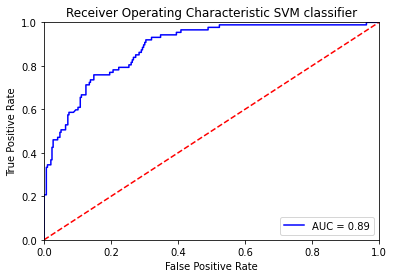

In [ ]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       


In [ ]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)

Top Positive Coefficients
london 0.7724660858604643
were 0.8241047079030781
glad 0.826252646042635
ones 0.8385287326720421
loved 0.8612195138350809
fine 0.8663647213602643
see 0.8950270295007308
free 0.8977004512720107
are 0.9036324494476251
amazing 0.9224638652155881
some 0.9380303320218641
following 1.0366048988394811
really 1.0449463505262553
rules 1.2125484486271745
thank 1.2981041684555086
better 1.4375688391900845
support 1.4473503040070028
good 1.7266301041196204
help 2.1518804323348353
follow 2.9310921597379065

Top Negative Coefficients
mental -1.5327023953378982
need -0.9434929007191295
how -0.9059272801377224
mentalhealth -0.7421153277462875
think -0.7408827858310916
too -0.7335689534737203
react -0.729938396362196
had -0.700562148839801
deaths -0.6970309896719541
made -0.6875176949999375
lockdown -0.6694534515279942
people -0.6658251537859361
break -0.6622430927306026
inequalities -0.6142967354821184
important -0.6064613744024896
have -0.5920383898229876
died -0.58907980889